In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

In [16]:
benchmarks_file = '../implementation/results/experiment-2.json'
with open(benchmarks_file) as d:
    benchmarks = json.load(d)

In [17]:
plot_points_linear = []
for benchmark in benchmarks:
    client = benchmark['type']
    chain_size = benchmark['chainSize'] / 365    
    bytesTransferred = benchmark['bytesDownloaded'] + benchmark['bytesUploaded']
    timeToSync = benchmark['timeToSync'] / 1000
    n = benchmark['batchSize' if client != 'superlight' else 'treeDegree']
    plot_points_linear.append([client, chain_size, bytesTransferred, timeToSync, n])

In [18]:
points_df = pd.DataFrame(plot_points_linear, columns=['client', 'chain_size', 'bytesTransferred', 'timeToSync', 'n'])
points_df_mean = points_df.groupby(['client', 'chain_size', 'n']).mean().reset_index()

In [19]:
points_df_mean

,client,chain_size,n,bytesTransferred,timeToSync
0,superlight,1.873973,2,547657.8,36.0356
1,superlight,1.873973,5,543620.0,22.2332
2,superlight,3.747945,2,586985.2,40.2298
3,superlight,3.747945,5,555861.0,22.3768
4,superlight,7.498630,2,581127.8,41.5334
5,superlight,7.498630,5,539748.6,22.2388
6,superlight,15.000000,2,590760.8,43.8692
7,superlight,15.000000,5,553955.6,23.3200
8,superlight,30.000000,2,611625.2,47.5006
9,superlight,30.000000,5,549340.8,25.1940


In [20]:
op_df = points_df_mean[points_df_mean['client'] == 'superlight']
op_df_2 = op_df[points_df_mean['n'] == 2]
slc_bt_2 = op_df_2['bytesTransferred']
slc_tos_2 = op_df_2['timeToSync']
slc_chain_size_2 = op_df_2['chain_size']

op_df_5 = op_df[points_df_mean['n'] == 5]
slc_bt_5 = op_df_5['bytesTransferred']
slc_tos_5 = op_df_5['timeToSync']
slc_chain_size_5 = op_df_5['chain_size']

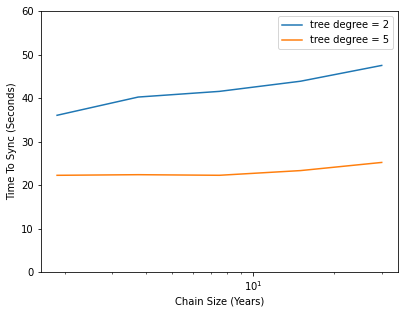

In [23]:
plt.plot(slc_chain_size_2, slc_tos_2, label ='tree degree = 2')
plt.plot(slc_chain_size_5, slc_tos_5, label ='tree degree = 5')


plt.xlabel('Chain Size (Years)')
plt.ylabel('Time To Sync (Seconds)')
plt.xscale('log')
plt.ylim((0, 60))
plt.legend()
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.show()